<a href="https://colab.research.google.com/github/KaniniKagendo/KaniniKagendo/blob/main/Group_5_PDS_kq_customer_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kenya Airways & Industry Airline Customer Reviews Analysis Notebook**


---
 
![Kenya Airways Image](https://www.kindpng.com/picc/m/337-3373993_kenya-airways-hd-png-download.png)

> ## **Introduction**   
> Kenya Airways receives airline reviews from trip advisors from both local, continental and international travellers. Their customer service team would like to extract insights from their customer reviews on TripAdvisor and conduct competitor analysis of the top 10 airlines from Skytrax Ranking to discover their competitive edge and where they fall short. 

> However, they need help analyzing reviews due to the large volume of customer reviews they have to go through manually. It's time-consuming and resource-intensive. Additionally, there’s a challenge in identifying common trends and themes in customer feedback, considering customers provide review feedback on a wide range of topics, e.g. quality of food to their in-flight experiences.

> In this notebook we will be using text mining and sentiment analysis to process and analyze customer reviews to help Kenya Airways overcome these challenges through Data Science & Analytics. This would allow the airline to quickly and efficiently gain insights from the data and identify common issues and trends in customer feedback. The airline could then use this information to improve its products and services and provide better support to its customers.

> ## **Dataset Source**   
> To meet the objectives of the analysis we've extracted Airline customer reviews feedback from TripAdvisor for Kenya Airways and the top 10 leading airlines in Africa by SkyTrack Ranking. This datasets will help us analyze reviews both at organization level (Kenya Airways) and how it compares to Industry (9 other airlines).

Datasets can be accessed through github repository via [This Link](https://github.com/billyotieno/analytics-datasets/tree/main/Transport%20Services/Airlines/african-airlines-reviews-dataset)


# **Table of Contents**
* [Setting up and Installing Required Libraries]()
* [Loading Data]()
* [Initial Data Exploration]()
* [Text Data Clean-up]()
* [Text Data Pre-processing]()
* [Analysis]()
* [Modelling]()
* [Evaluate Results]()

## **Setting up and Installing Required Libraries**

In [ ]:
# Installing required libraries (-q quiet installing all libraries)
! pip install -q pandas pandera numpy matplotlib seaborn textblob dask missingno
! pip install -q fasttext 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Install pandas profiling - required for initial exporation
!pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 22.0 MB 19.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 33.1 MB/s eta 0:00:00


In [ ]:
# Install NLP Profiler for text datasets
# !pip install -U -q git+https://github.com/neomatrix369/nlp_profiler@scale-when-applied-to-larger-datasets
# print("\n Installation Completed")

!pip install -U -q git+https://github.com/neomatrix369/nlp_profiler.git@master

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.8/775.8 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

## **Sourcing Data from the Github Respository**

In [4]:
from google.colab import files

# Create an airline-datasets directory on google colab to host the files
!rm -rf airline-datasets
!mkdir -p airline-datasets
!cd airline-datasets

# fetch all the datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/kenya_airways_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/air_mauritius.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/egypt_airways.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/ethiopian_airlines.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/fastjet_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/flysafair_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/royal_air_maroc.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/rwand_air_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/seychelles_airways.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/south_african_airways.csv" -P ./airline-datasets

kenya_airways_fligh 100%[===================>]   2.64M  --.-KB/s    in 0.04s   
air_mauritius.csv   100%[===================>]   1.46M  --.-KB/s    in 0.04s   
egypt_airways.csv   100%[===================>]   2.77M  --.-KB/s    in 0.05s   
ethiopian_airlines. 100%[===================>]   2.84M  --.-KB/s    in 0.06s   
fastjet_flights.csv 100%[===================>] 260.37K  --.-KB/s    in 0.02s   
flysafair_flights.c 100%[===================>] 919.14K  --.-KB/s    in 0.03s   
royal_air_maroc.csv 100%[===================>]   2.11M  --.-KB/s    in 0.07s   
rwand_air_flights.c 100%[===================>] 575.57K  --.-KB/s    in 0.02s   
seychelles_airways. 100%[===================>] 451.21K  --.-KB/s    in 0.03s   
south_african_airwa 100%[===================>]   2.97M  --.-KB/s    in 0.05s   


## **Importing Required Libraries**

In [5]:
# Import required libraries
import pandas as pd
import pandera as pn
import dask 
import seaborn as sns
import spacy
import re
import nltk
import string
import fasttext
import warnings
import inflect # converting numbers in text to words
import missingno as msno
from pandas_profiling import ProfileReport
from nlp_profiler.core import apply_text_profiling

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import wordpunct_tokenize
import matplotlib.pyplot as plt

# Pandas settings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 20)
pd.options.display.max_rows = 4000
from IPython.display import Image

%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)

# NLTK Download Options
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
INFO:language_tool_python.download_lt:Unzipping /tmp/tmppoeq9gtj.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
# Visualization Fonts
!wget -O IBM_Sans.zip "https://fonts.google.com/download?family=IBM%20Plex%20Sans"
!wget -O McKinsey_Bower.zip "https://cdn.mckinsey.com/assets/fonts/web/Bower_Fonts.zip"

--2023-01-26 19:28:07--  https://fonts.google.com/download?family=IBM%20Plex%20Sans
Resolving fonts.google.com (fonts.google.com)... 74.125.142.113, 74.125.142.138, 74.125.142.102, ...
Connecting to fonts.google.com (fonts.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘IBM_Sans.zip’

IBM_Sans.zip            [  <=>               ]   1.11M  5.38MB/s    in 0.2s    

2023-01-26 19:28:08 (5.38 MB/s) - ‘IBM_Sans.zip’ saved [1161709]

--2023-01-26 19:28:08--  https://cdn.mckinsey.com/assets/fonts/web/Bower_Fonts.zip
Resolving cdn.mckinsey.com (cdn.mckinsey.com)... 52.84.162.8, 52.84.162.44, 52.84.162.129, ...
Connecting to cdn.mckinsey.com (cdn.mckinsey.com)|52.84.162.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162944 (159K) [application/zip]
Saving to: ‘McKinsey_Bower.zip’

McKinsey_Bower.zip  100%[===================>] 159.12K   876KB/s    in 0.2s    

2023-01-26 1

In [7]:
!unzip -o '*.zip'

Archive:  IBM_Sans.zip
  inflating: OFL.txt                 
  inflating: IBMPlexSans-Thin.ttf    
  inflating: IBMPlexSans-ThinItalic.ttf  
  inflating: IBMPlexSans-ExtraLight.ttf  
  inflating: IBMPlexSans-ExtraLightItalic.ttf  
  inflating: IBMPlexSans-Light.ttf   
  inflating: IBMPlexSans-LightItalic.ttf  
  inflating: IBMPlexSans-Regular.ttf  
  inflating: IBMPlexSans-Italic.ttf  
  inflating: IBMPlexSans-Medium.ttf  
  inflating: IBMPlexSans-MediumItalic.ttf  
  inflating: IBMPlexSans-SemiBold.ttf  
  inflating: IBMPlexSans-SemiBoldItalic.ttf  
  inflating: IBMPlexSans-Bold.ttf    
  inflating: IBMPlexSans-BoldItalic.ttf  

Archive:  McKinsey_Bower.zip
  inflating: Bower-Bold.woff2        
  inflating: __MACOSX/._Bower-Bold.woff2  
  inflating: Bower-Bold.woff         
  inflating: __MACOSX/._Bower-Bold.woff  
  inflating: Bower-Bold.eot          
  inflating: __MACOSX/._Bower-Bold.eot  
  inflating: Bower-Bold.otf          
  inflating: __MACOSX/._Bower-Bold.otf  

2 archives we

In [8]:
!mv *.ttf /usr/share/fonts/truetype/
!mv *.otf /usr/share/fonts/truetype/

## **Loading Data into DataFrames**

In [9]:
from pathlib import Path 

path = "./airline-datasets/"
files = Path(path).glob('*.csv')

In [10]:
# Read data into dataframe with a new column identifying airline dataset
dfs = list()
for f in files:
  data = pd.read_csv(f, 
                     usecols=['Title','Image','Avatar_URL',
                              'crvsd','ui_header_link','default',
                              'phmbo','phmbo1','dmrsr','dmrsr2','dmrsr3',
                              'qwuub_URL','qwuub','tehyy','xcjrc',
                              'Rating'])
  data['source'] = f.stem
  dfs.append(data)

In [11]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,Title,Image,Avatar_URL,crvsd,ui_header_link,default,phmbo,phmbo1,dmrsr,dmrsr2,dmrsr3,qwuub_URL,qwuub,tehyy,xcjrc,Rating,source
0,My wife and I we...,https://media-cd...,https://www.trip...,Shiva Raghunanan...,Shiva Raghunanan,NaN,1 contribution,NaN,Luxor - Rome,International,Economy,https://www.trip...,Worst Airline Se...,Date of travel: ...,This review is t...,ui_bubble_rating...,egypt_airways
1,I was somewhat c...,https://media-cd...,https://www.trip...,Michael_E01 wrot...,Michael_E01,NaN,63 contributions,62 helpful votes,Cairo - Moscow,International,Business Class,https://www.trip...,No thrills but p...,Date of travel: ...,This review is t...,ui_bubble_rating...,egypt_airways
2,I traveled with ...,https://media-cd...,https://www.trip...,Shadi_Alkasim wr...,Shadi_Alkasim,"Leshan, China",4901 contributions,35 helpful votes,Amman - Cairo,International,Economy,https://www.trip...,Perfect Flight,Date of travel: ...,This review is t...,ui_bubble_rating...,egypt_airways
3,We unfortunately...,https://media-cd...,https://www.trip...,Gary Morris wrot...,Gary Morris,"Richmond Hill, C...",3 contributions,2 helpful votes,Cairo - Toronto,International,Economy,https://www.trip...,Worst airline ever.,Date of travel: ...,This review is t...,ui_bubble_rating...,egypt_airways
4,Absolutely appal...,https://media-cd...,https://www.trip...,Henrykipper wrot...,Henrykipper,"Fareham, United ...",27 contributions,19 helpful votes,Cairo - London,International,Economy,https://www.trip...,Rude Staff,Date of travel: ...,This review is t...,ui_bubble_rating...,egypt_airways


## **Initial Data Exploration**

### **Renaming Columns to Clear Columns**

In [12]:
# Rename dataset to clear & understandable columns
column_rename = {
    'Title':'review', 
    'Image':'review_image', 
    'Avatar_URL':'avatar_url', 
    'crvsd':'writing_month', 
    'ui_header_link':'reviewer_username', 
    'default':'reviewer_city',
    'phmbo':'reviewer_contribution', 
    'phmbo1':'helpful_votes', 
    'dmrsr':'flight_path', 
    'dmrsr2':'flight_type', 
    'dmrsr3':'travel_class', 
    'qwuub_URL':'review_link', 
    'qwuub':'review_headline',
    'tehyy':'travel_month', 
    'xcjrc':'disclaimer', 
    'Rating':'review_rating', 
    'source':'airline'
}

df.rename(columns=column_rename, inplace=True)

In [13]:
# Proper Naming for Airlines
df['airline'] = df.airline.astype('category')
df['airline'] = df['airline'].cat.rename_categories({
  'air_mauritius':'Air Mauritius',
  'egypt_airways':'Egypt Air',
  'ethiopian_airlines':'Ethiopian Airlines',
  'fastjet_flights':'FastJet',
  'flysafair_flights':'FlySafair',
  'kenya_airways_flights':'Kenya Airways',
  'royal_air_maroc':'Royal Air Maroc',
  'rwand_air_flights':'RwandAir',
  'seychelles_airways':'Air Seychelles',
  'south_african_airways':'South African Airways',
})

In [14]:
# Check new columns
df.columns

Index(['review', 'review_image', 'avatar_url', 'writing_month',
       'reviewer_username', 'reviewer_city', 'reviewer_contribution',
       'helpful_votes', 'flight_path', 'flight_type', 'travel_class',
       'review_link', 'review_headline', 'travel_month', 'disclaimer',
       'review_rating', 'airline'],
      dtype='object')

### **Checking Dataset Shape**

In [15]:
# Checking dataframe shape
df.shape

(15674, 17)

### **Checking DataTypes**

In [16]:
# Checking datatypes
df.dtypes

review                     object
review_image               object
avatar_url                 object
writing_month              object
reviewer_username          object
reviewer_city              object
reviewer_contribution      object
helpful_votes              object
flight_path                object
flight_type                object
travel_class               object
review_link                object
review_headline            object
travel_month               object
disclaimer                 object
review_rating              object
airline                  category
dtype: object

### **Checking for Missing Values**

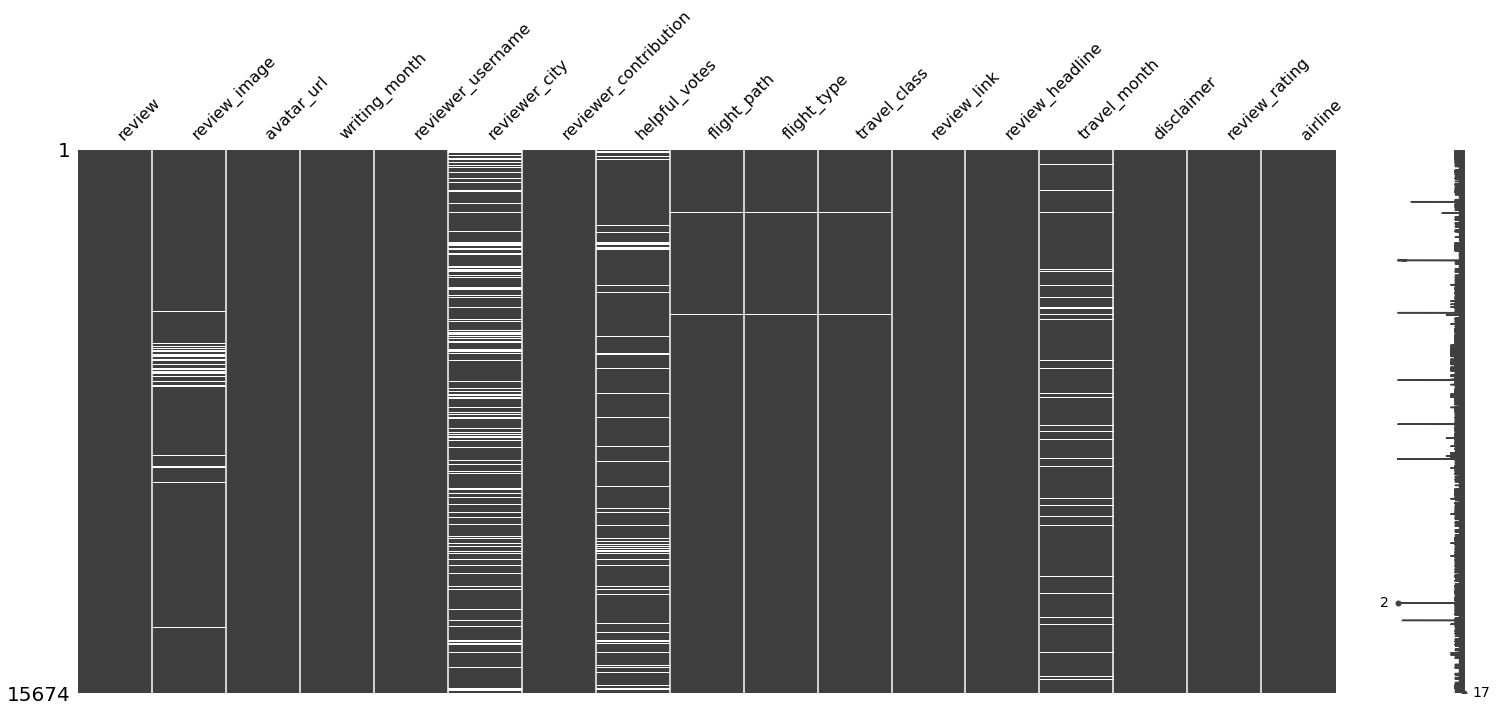

In [17]:
# Check for Missing Values
msno.matrix(df)

### **Dataset Description**

In [18]:
# Checking dataframe description
df.describe(include='all')

,review,review_image,avatar_url,writing_month,reviewer_username,reviewer_city,reviewer_contribution,helpful_votes,flight_path,flight_type,travel_class,review_link,review_headline,travel_month,disclaimer,review_rating,airline
count,15674,14889,15648,15641,15639,12395,15639,14012,15634,15636,15618,15640,15639,14812,15639,15640,15674
unique,15526,4756,13543,14720,12932,3438,1066,538,3003,25,13,15490,13190,111,14,14,10
top,A long flight bu...,https://media-cd...,https://www.trip...,Angela S wrote a...,Safariafficionado,"Johannesburg, So...",1 contribution,1 helpful vote,Johannesburg - C...,International,Economy,https://www.trip...,Good flight,Date of travel: ...,This review is t...,ui_bubble_rating...,South African Ai...
freq,14,171,34,14,34,539,1292,1372,303,9955,13261,14,63,536,15626,4209,2866


### **Initial Data Cleaning: Overlapped Text**

In [19]:
# Initial dataset cleaning to support exploration
def remove_overlapped_text(df):
  df = df.copy()
  index = df[(df["travel_class"] != "Economy") & (df["travel_class"] != "Business Class") & (df["travel_class"] != "First Class")].index 
  df.drop(index, inplace=True)
  return df

df = remove_overlapped_text(df)
df.shape

(15605, 17)

## **Data Exploration: Focused on Non-Review Columns**

### **Total Number of Reviews by Airlines**

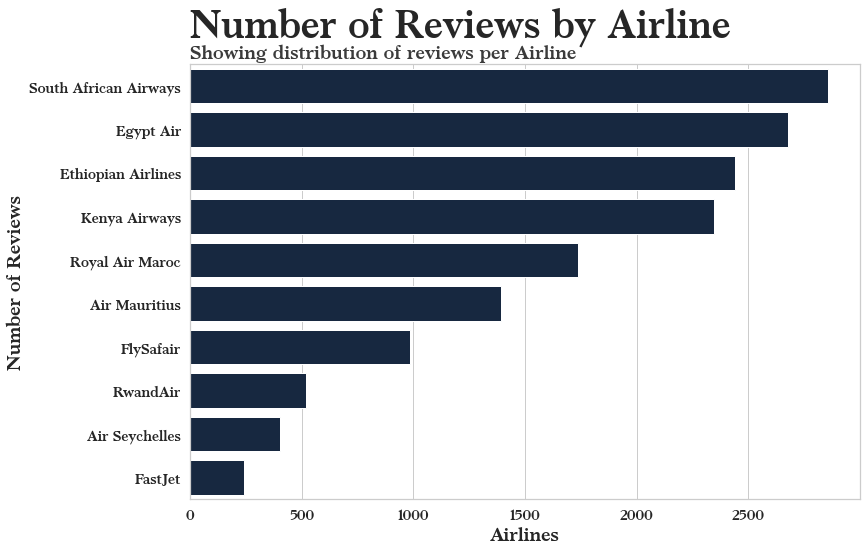

In [20]:
import matplotlib.font_manager as fm
viz_color = "#102747"

# path = '/usr/share/fonts/truetype/IBMPlexSans-Regular.ttf'
path = '/usr/share/fonts/truetype/Bower-Bold.otf'
fontprop = fm.FontProperties(fname=path)


sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Number of Reviews by Airline", ha='left', fontproperties=fontprop, fontsize=40, x=0.125, y=0.98)
plt.title("Showing distribution of reviews per Airline", loc='left',alpha=0.9, fontproperties=fontprop, fontsize=20)

sns.countplot(data=df, y="airline", ax=ax, color=viz_color, order=df['airline'].value_counts().index)

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Airlines', fontproperties=fontprop, fontsize=20)
plt.ylabel('Number of Reviews', fontproperties=fontprop, fontsize=20)

# ax.set(ylabel="Airlines", xlabel="Number of Reviews")

plt.show()

### **Flight Types or Regions Travelled by Reviewers for Each Airline**

In [21]:
# What are the most common flight types across the various airlines experience by reviewers?
airline_flight_type = df.groupby(['airline', 'flight_type']).size().reset_index().pivot(columns='flight_type', index='airline', values=0)
airline_flight_type

flight_type,Africa,Asia,Domestic,Europe,International,Middle East,North Africa,North Asia,Russia,South America,Southeast Asia
airline,,,,,,,,,,,
Air Mauritius,410,0,19,0,961,0,0,0,0,0,3
Egypt Air,51,1,338,4,2127,2,156,0,0,0,1
Ethiopian Airlines,417,2,52,6,1910,0,35,2,0,6,9
FastJet,118,0,122,0,1,0,0,0,0,0,0
FlySafair,3,0,975,0,8,0,0,0,0,0,0
Kenya Airways,861,3,116,0,1353,0,7,2,0,0,6
Royal Air Maroc,37,0,66,0,1585,0,50,0,1,0,0
RwandAir,303,1,1,0,211,0,1,2,0,0,0
Air Seychelles,139,0,35,0,229,0,0,0,0,0,0


### **Distribution of Ratings (1 -5)**

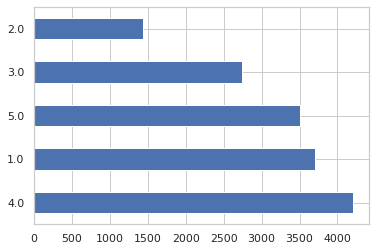

In [22]:
# What is the distribution of Ratings in the review dataset??
# Clean up review rating & convert column into ratings / interger
df.review_rating = df.review_rating.str[-2:]
df.review_rating = df.review_rating.astype(int) / 10
df.review_rating.value_counts().plot(kind="barh")

## **Average Rating Across the Airlines for the Various Travel Classes**

In [23]:
# Whats the average rating experience by travellers within KQ and across the various airlines in the different classes?
import numpy as np

plt.figure(figsize=(12, 8), dpi= 80)
airline_class_review = df.groupby(['airline', 'travel_class']).agg({'review_rating':[np.mean]}).reset_index().pivot(columns="travel_class", index="airline").droplevel(0, axis=1).droplevel(0, axis=1) 
airline_class_review

travel_class,Business Class,Economy,First Class
airline,,,
Air Mauritius,3.624454,3.238832,NaN
Egypt Air,3.311475,3.167510,3.052632
Ethiopian Airlines,3.573034,2.936309,NaN
FastJet,NaN,2.929461,NaN
FlySafair,NaN,3.898580,NaN
Kenya Airways,3.408377,3.052391,NaN
Royal Air Maroc,2.379032,2.283591,NaN
RwandAir,3.777778,3.484649,NaN
Air Seychelles,3.595745,3.008427,NaN


<Figure size 960x640 with 0 Axes>

### **Data Cleaning: Correcting Travel Month Column**

In [24]:
# Clean Travel Month
df.travel_month = df.travel_month.str[16:]
df.travel_month

0        November 2022
1         October 2022
2            July 2022
3        November 2022
4        November 2022
             ...      
15669       March 2015
15670    February 2016
15671    February 2016
15672     January 2016
15673    November 2015
Name: travel_month, Length: 15605, dtype: object

In [25]:
df['travel_year'] = df.travel_month.str[-4:]
df.travel_year.head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: travel_year, dtype: object

In [26]:
# Assumptions, due to extraction error, we'll convert 25** years to 2022
df.isna().sum()

review                      0
review_image              765
avatar_url                  0
writing_month               0
reviewer_username           1
reviewer_city            3242
reviewer_contribution       0
helpful_votes            1625
flight_path                 0
flight_type                 0
travel_class                0
review_link                 0
review_headline             1
travel_month              824
disclaimer                  0
review_rating               0
airline                     0
travel_year               824
dtype: int64

### **Exploring Review Ratings by Airline and Flight Travel Class**

Travellers have had a great experience with Business Class as opposed to Economy Class. For FlySafair its expected since they only have Economy Class.

Text(84.5, 0.5, 'Airlines')

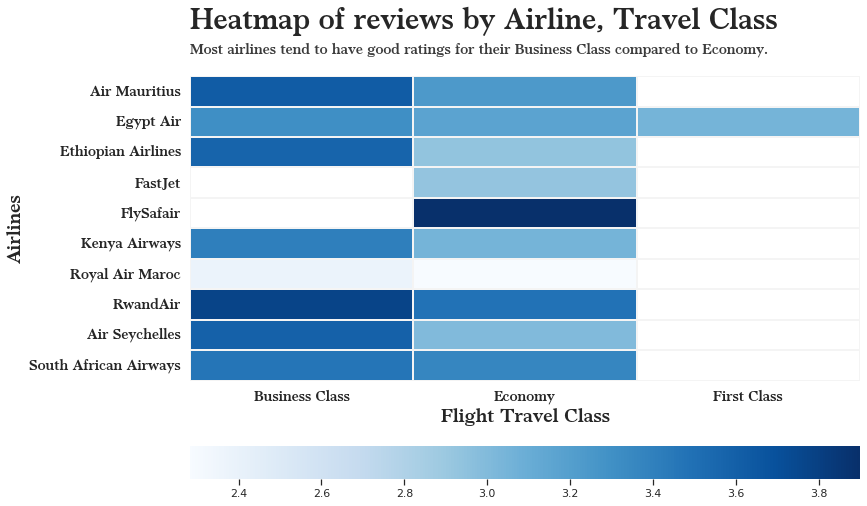

In [27]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Heatmap of reviews by Airline, Travel Class", ha='left', fontproperties=fontprop, fontsize=30, x=0.125, y=1)
plt.title("Most airlines tend to have good ratings for their Business Class compared to Economy. \n", 
          loc='left', alpha=0.9, fontproperties=fontprop, fontsize=15)

sns.heatmap(airline_class_review, cmap="Blues", linewidth=1, linecolor="#F4F4F4", cbar_kws = {"location":"bottom", "use_gridspec":False})

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Flight Travel Class', fontproperties=fontprop, fontsize=20)
plt.ylabel('Airlines', fontproperties=fontprop, fontsize=20)

Text(84.5, 0.5, 'Airlines')

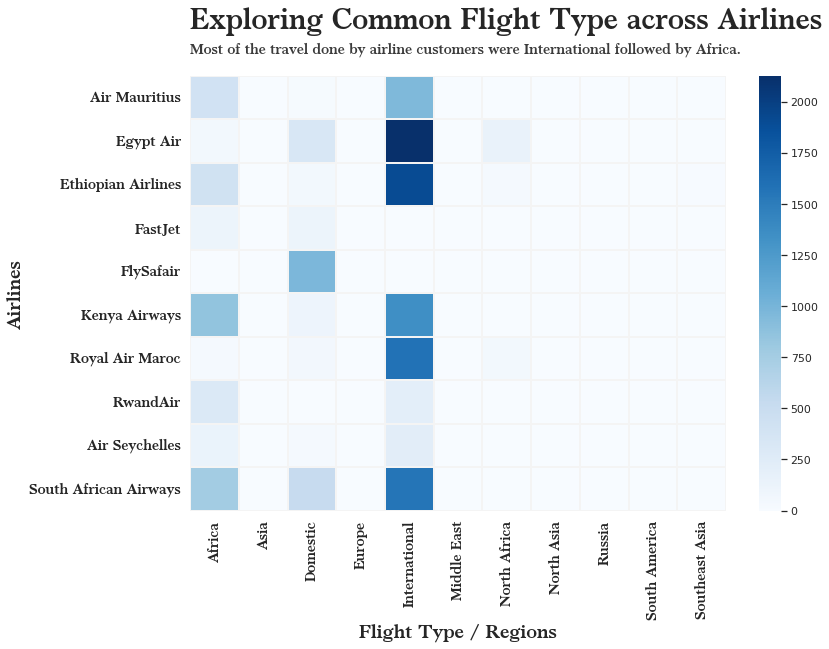

In [28]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Exploring Common Flight Type across Airlines", ha='left', fontproperties=fontprop, fontsize=30, x=0.125, y=1)
plt.title("Most of the travel done by airline customers were International followed by Africa. \n", 
          loc='left', alpha=0.9, fontproperties=fontprop, fontsize=15)

sns.heatmap(airline_flight_type, cmap="Blues", linewidth=1, linecolor="#F4F4F4")

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Flight Type / Regions', fontproperties=fontprop, fontsize=20)
plt.ylabel('Airlines', fontproperties=fontprop, fontsize=20)

In [29]:
airline_travel_class = df.groupby(['airline', 'travel_class']).size().reset_index().pivot(columns='travel_class', index='airline', values=0)
airline_travel_class

travel_class,Business Class,Economy,First Class
airline,,,
Air Mauritius,229,1164,0
Egypt Air,488,2173,19
Ethiopian Airlines,445,1994,0
FastJet,0,241,0
FlySafair,0,986,0
Kenya Airways,382,1966,0
Royal Air Maroc,124,1615,0
RwandAir,63,456,0
Air Seychelles,47,356,0


Text(0, 0.5, 'Airlines')

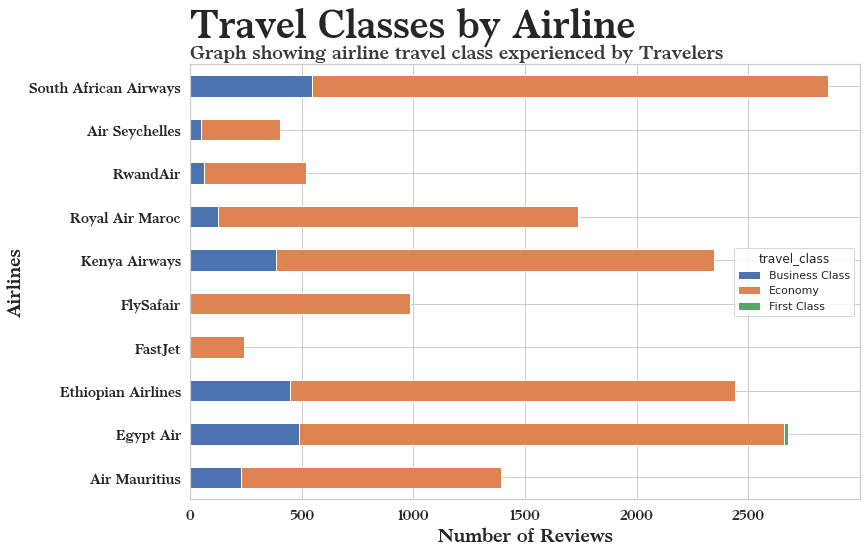

In [30]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Travel Classes by Airline", ha='left', fontproperties=fontprop, fontsize=40, x=0.125, y=0.98)
plt.title("Graph showing airline travel class experienced by Travelers", loc='left',alpha=0.9, fontproperties=fontprop, fontsize=20)

airline_travel_class.plot(kind="barh", stacked=True, ax=ax, )

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Number of Reviews', fontproperties=fontprop, fontsize=20)
plt.ylabel('Airlines', fontproperties=fontprop, fontsize=20)

Text(0, 0.5, 'Flight Paths')

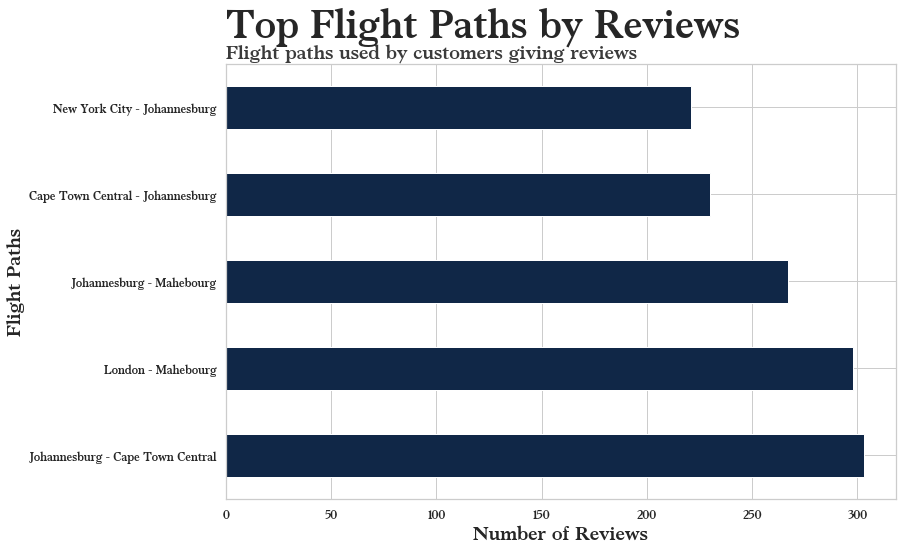

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Top Flight Paths by Reviews", ha='left', fontproperties=fontprop, fontsize=40, x=0.125, y=0.98)
plt.title("Flight paths used by customers giving reviews", loc='left',alpha=0.9, fontproperties=fontprop, fontsize=20)

plt.xticks(fontproperties=fontprop, fontsize=12)
plt.yticks(fontproperties=fontprop, fontsize=12)

df.flight_path.value_counts()[:5].plot(kind='barh', color=viz_color)

plt.xlabel('Number of Reviews', fontproperties=fontprop, fontsize=20)
plt.ylabel('Flight Paths', fontproperties=fontprop, fontsize=20)

In [ ]:
df.describe()

,review_rating
count,15605.000000
mean,3.151169
std,1.479597
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# preparing text dataset
text_nlp = pd.DataFrame(df, columns=['review'])
text_nlp.head()

,review
0,. They cancelled...
1,I traveled here ...
2,I am so disappoi...
3,the dishonesty s...
4,My 1st flight sa...


In [ ]:
profile_data = apply_text_profiling(text_nlp, 'review', params={'spelling_check': False,
                                                                     'grammar_check': False,
                                                                     'ease_of_reading_check':False,
                                                                     'parallelisation_method': 'default'})

final params: {'high_level': True, 'granular': True, 'grammar_check': False, 'spelling_check': False, 'ease_of_reading_check': False, 'parallelisation_method': 'default'}


In [ ]:
profile_text = ProfileReport(profile_data)
profile_text.to_file("airline-review-text-profiler-form.html")

In [ ]:
profile_data.to_csv("airline-review-text-profiled-dataset.csv")

In [ ]:
profile_data.head()

,review,sentences_count,characters_count,repeated_letters_count,spaces_count,chars_excl_spaces_count,repeated_spaces_count,whitespaces_count,chars_excl_whitespaces_count,repeated_whitespaces_count,...,noun_phrase_count,english_characters_count,non_english_characters_count,syllables_count,sentiment_polarity_score,sentiment_polarity,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised
0,. They cancelled...,5,160,0,30,130,0,30,130,0,...,9,159,1,38,0.000000,Neutral,Neutral,0.033333,Quite objective,Objective
1,I traveled here ...,12,967,0,187,780,0,187,780,0,...,45,967,0,246,-0.055909,Pretty negative,Negative,0.539747,Objective/subjec...,Objective/subjec...
2,I am so disappoi...,7,829,0,159,670,0,159,670,0,...,44,829,0,201,-0.193750,Pretty negative,Negative,0.518750,Objective/subjec...,Objective/subjec...
3,the dishonesty s...,2,465,0,79,386,0,80,385,0,...,34,465,0,114,-0.050000,Pretty negative,Negative,0.300000,Pretty objective,Objective
4,My 1st flight sa...,19,1163,0,222,941,1,222,941,1,...,72,1159,4,284,-0.034722,Pretty negative,Negative,0.377778,Pretty objective,Objective


In [ ]:
profile_data.describe()

,sentences_count,characters_count,repeated_letters_count,spaces_count,chars_excl_spaces_count,repeated_spaces_count,whitespaces_count,chars_excl_whitespaces_count,repeated_whitespaces_count,count_words,...,punctuations_count,repeated_punctuations_count,stop_words_count,dates_count,noun_phrase_count,english_characters_count,non_english_characters_count,syllables_count,sentiment_polarity_score,sentiment_subjectivity_score
count,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,...,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000
mean,6.341749,564.337969,0.009676,100.916437,463.421532,0.839731,102.455687,461.882281,1.290804,101.439090,...,13.167574,0.375457,44.200897,0.002307,35.917526,563.890996,0.446972,137.906632,0.164814,0.534565
std,5.943220,605.470204,0.126965,110.840930,495.027976,3.480327,112.913840,492.884620,3.708543,110.198471,...,15.124653,1.341736,50.890210,0.056560,35.670787,604.952409,5.566241,149.290829,0.259604,0.145514
min,1.000000,16.000000,0.000000,2.000000,14.000000,0.000000,2.000000,14.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.000000,3.000000,-1.000000,0.000000
25%,3.000000,216.000000,0.000000,37.000000,178.000000,0.000000,37.000000,178.000000,0.000000,38.000000,...,5.000000,0.000000,15.000000,0.000000,15.000000,216.000000,0.000000,52.000000,0.000000,0.448653
50%,5.000000,378.000000,0.000000,67.000000,311.000000,0.000000,68.000000,310.000000,0.000000,67.000000,...,9.000000,0.000000,29.000000,0.000000,25.000000,378.000000,0.000000,92.000000,0.158633,0.528968
75%,8.000000,687.000000,0.000000,124.000000,564.000000,0.000000,126.000000,562.000000,1.000000,124.000000,...,16.000000,0.000000,54.000000,0.000000,44.000000,686.000000,0.000000,168.000000,0.335333,0.620000
max,109.000000,9903.000000,6.000000,1811.000000,8131.000000,273.000000,1828.000000,8092.000000,273.000000,1780.000000,...,303.000000,56.000000,864.000000,3.000000,622.000000,9899.000000,502.000000,2431.000000,1.000000,1.000000
